# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [2]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

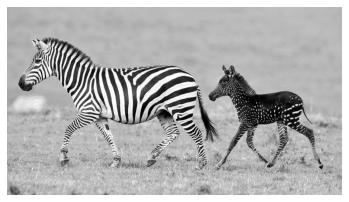

In [3]:
myimshow(zebra)

In [110]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [ ]:
image =np.array(io.imread(os.path.join('forme.jpg')))

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

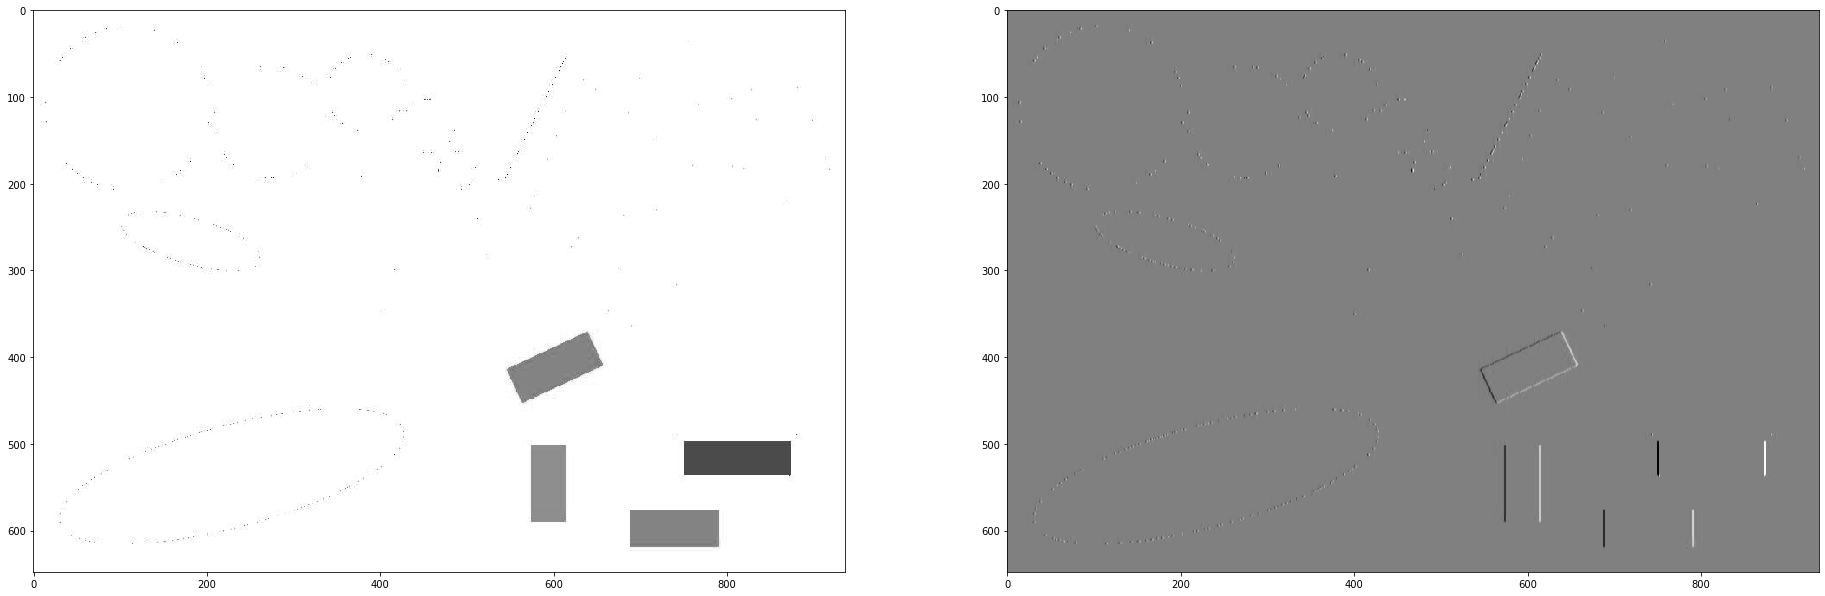

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data
from skimage import io, color
from skimage import filters
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
image =np.array(io.imread(os.path.join('rettangoli.jpg')))
image=rgb2gray(image)
plt.subplot(121)
plt.imshow(image,cmap='gray')
#vertical
v_result = filters.sobel_v(image)
plt.subplot(122)
plt.imshow(v_result,cmap='gray')

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

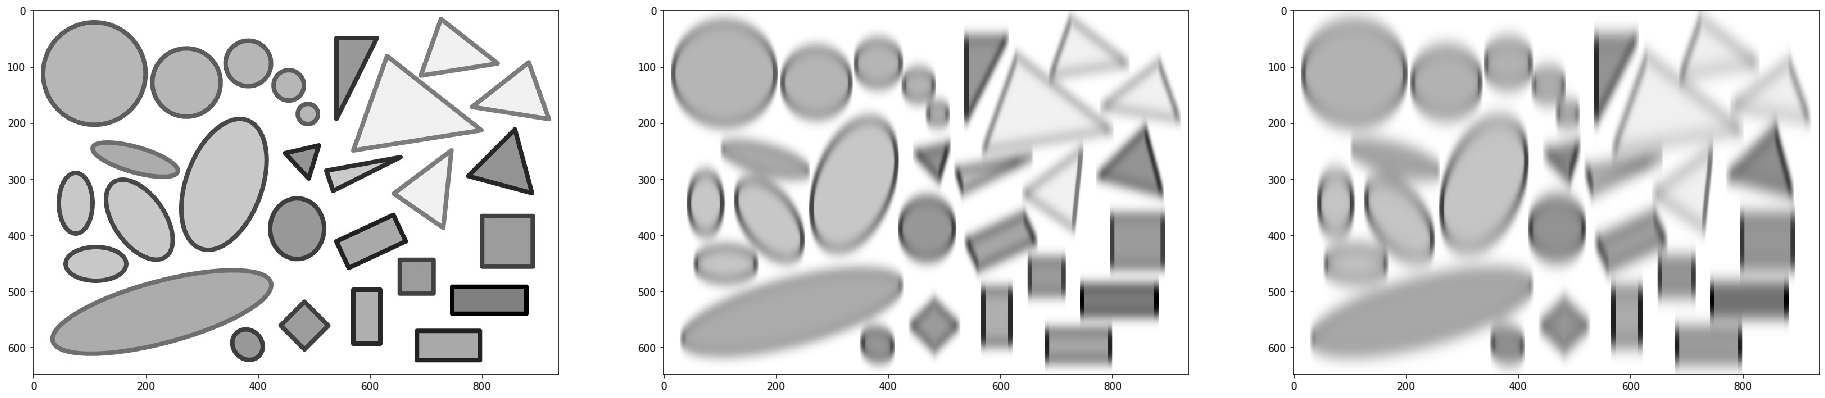

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import data
from skimage import io, color
from skimage import filters
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
image =np.array(io.imread(os.path.join('forme.jpg')))
image=rgb2gray(image)
plt.subplot(131)
plt.imshow(image,cmap='gray')
gaussian_result = filters.gaussian(image, sigma=10, multichannel=True)
plt.subplot(1,3,2)
plt.imshow(gaussian_result,cmap='gray')
gaussian_result1 = filters.gaussian(gaussian_result, sigma=10, multichannel=True)
plt.subplot(1,3,3)
plt.imshow(gaussian_result1,cmap='gray')

# Esercizio 4

Eliminare i cerchi verdi dalla figura

![](forme.jpg)

In [12]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray, gray2rgb
import skimage
from PIL import Image

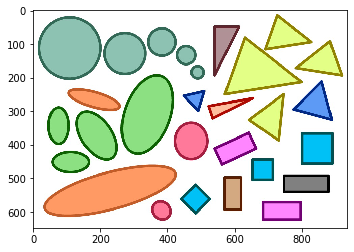

In [17]:
coin_colored = np.array(imageio.imread('forme.jpg'))
plt.imshow(coin_colored)

(1, 6, 3)


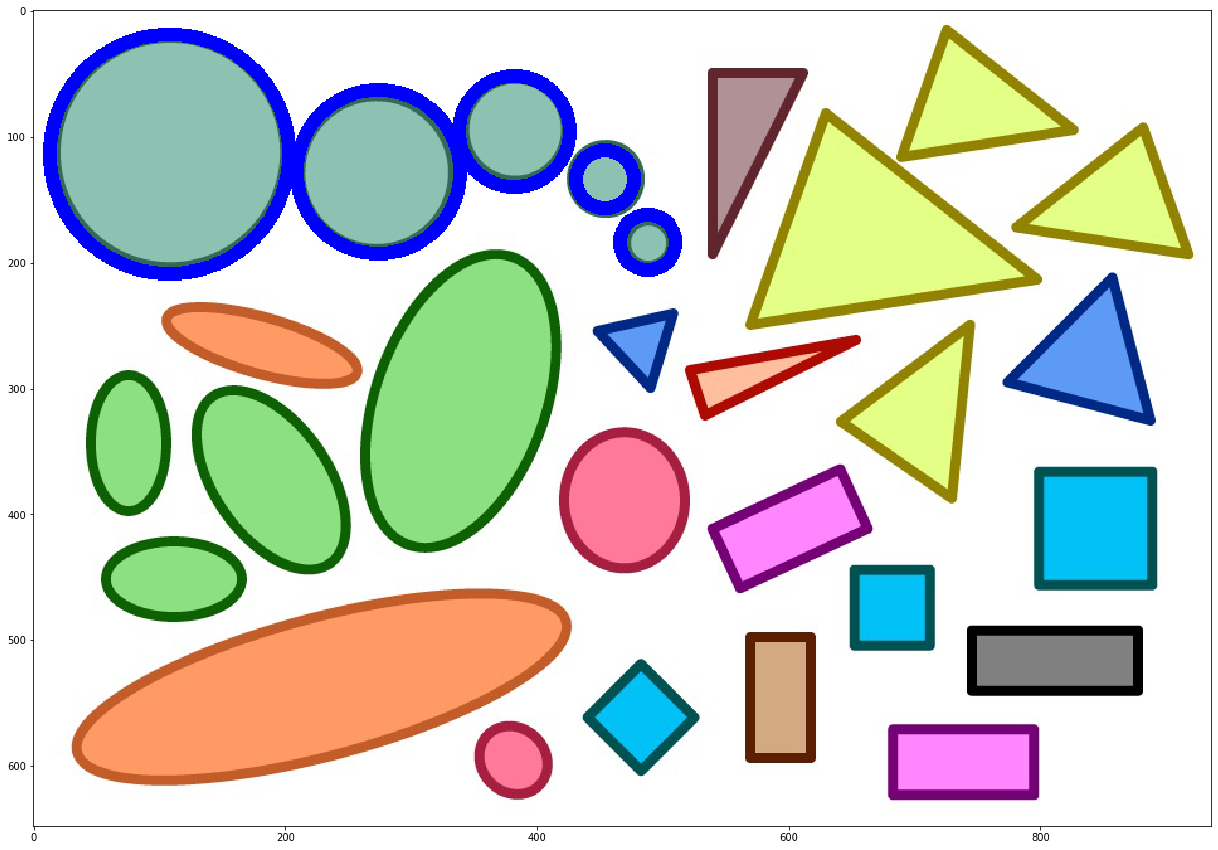

In [105]:
import imageio
import cv2
import skimage
from skimage import data

 

coin_colored = np.array(imageio.imread('forme.jpg'))  #carico l'immagine a colore
coin =color.rgb2gray(coin_colored)   #trasformo l'imm in bianco e nero
coin_blur = cv2.GaussianBlur(coin, (31, 31), 5) #(imm, dim kernel filtro, sigma) riduco il contenuto informativo dell'imm in input se troppo dettagliata e 
                                                #se vengono individuati piu cerchi di quanti ce ne sono davvero
img = skimage.img_as_ubyte(coin) #trasformo l'imm in bit
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=60, param1=90, param2=80, minRadius=20, maxRadius=100)
circles = np.uint16(np.around(circles_float)) #converte il risultato in x/y
print(circles.shape) #stampa per esempio: (1, 13, 3) --> 1 vettore fatto di 13 cerchi, ognuno dei quali è codificato con 3 elementi, ovvero x,y,raggio.
circles #stampa un array con i 13(nell esempio) cerchi come triple

 

# sort by x-coord
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]


 


img_coin = np.copy(coin_colored)

 

for i in range(circles.shape[0]):
     if(circles[i, 1]< coin_colored.shape[0]//2 ):
            c = (circles[i, 0], circles[i, 1])
            r = circles[i, 2]
            cv2.circle(img_coin, c, r, (0,0, 255), 10)
    
plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_coin);

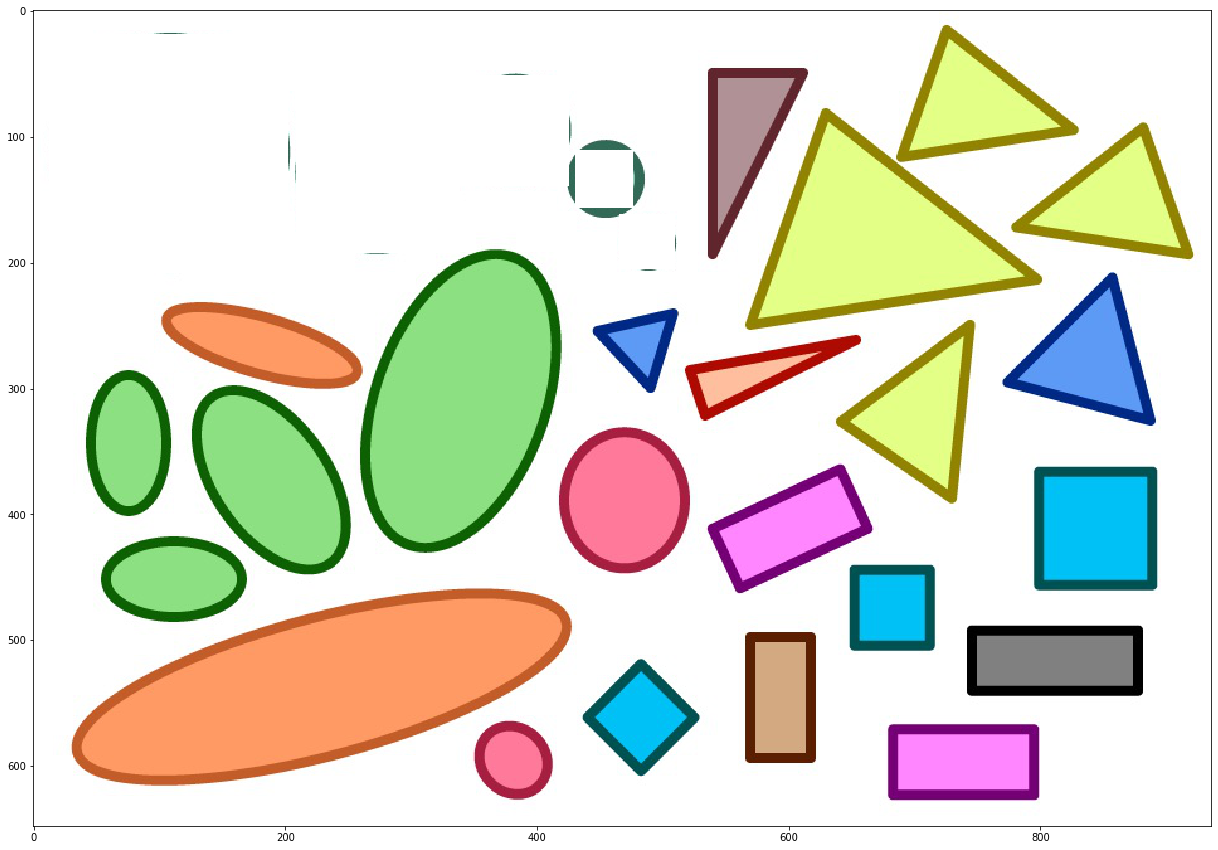

In [106]:
figure = Image.open(os.path.join('forme.jpg'))
ritaglio = imageio.imread('forme.jpg')
for i in range(circles.shape[0]):
    if(circles[i, 1]< coin_colored.shape[0]//2 ):
        c = (circles[i, 0], circles[i, 1])
        r = circles[i, 2]
        cv2.circle(img_coin, c, r, (0,0, 255), 10)
        (left, upper, right, lower) = (circles[i, 0]- circles[i, 2], circles[i, 1]- circles[i, 2],circles[i, 0]+ circles[i, 2], circles[i, 1]+circles[i, 2])
        ritaglio[(circles[i, 1]- circles[i, 2]):(circles[i, 1]+ circles[i, 2]),(circles[i, 0]- circles[i, 2]):(circles[i, 0]+circles[i, 2])]=255

    plt.imshow(ritaglio)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 25° in senso orario in (15, 25) e una traslazione di 10 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

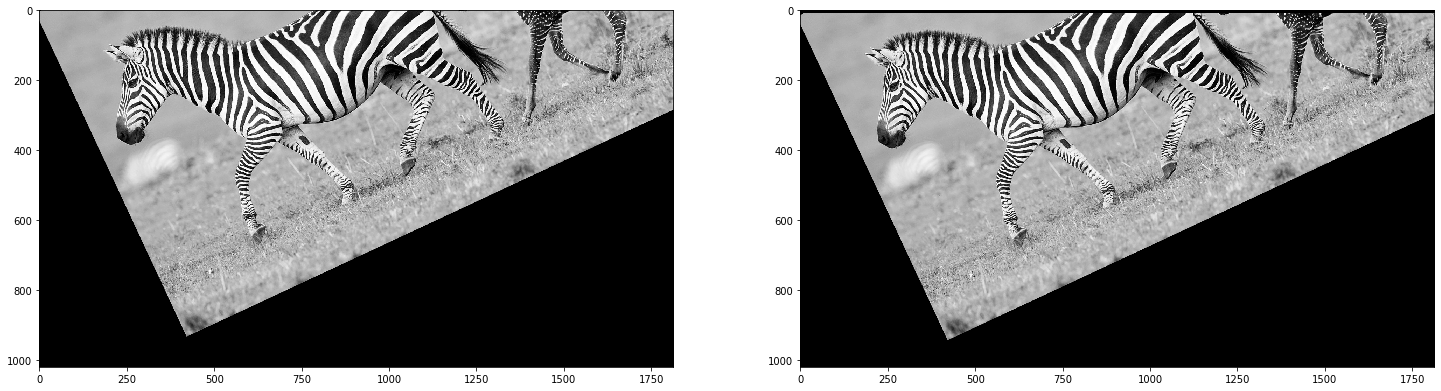

In [128]:

from skimage.transform import SimilarityTransform
img = cv2.imread(os.path.join('zebra.jpg'), cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape


M = cv2.getRotationMatrix2D((15,25),25,1) # params: center, angle, scale
dst1 = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121)
plt.imshow(dst1,cmap='gray')
# scendo l' immagine di 10 sul asse y
M = np.float32([[1,0,0],[0,1,10]]) 
dst = cv2.warpAffine(dst1, M, (cols,rows))
plt.subplot(122)
plt.imshow(dst,cmap='gray')